In [1]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import numpy as np
import pyVIA.core as via
import warnings
import pickle
warnings.filterwarnings('ignore')

/Users/kilpinen/opt/anaconda3/envs/ViaEnv_110923/bin/lib/python3.7/site-packages/phate/__init__.py


In [2]:
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

In [3]:
df = pd.read_csv('../rV2_bifurcation/analysis/Cell.embeddings.rv2.scRNA.200923.csv', sep=',')
print(df)

                  barcode  label    UMAP_1    UMAP_2       PC_1      PC_2  \
0     1F_AAACCCATCGCAGATT     12 -2.814074 -3.270332   6.508434  2.205969   
1     1F_AAACCCATCTGGTGGC      4  0.062361 -4.388985   3.841351 -0.140649   
2     1F_AAACGAAAGCCATTCA     12 -3.064729 -2.925782   7.337517  2.339450   
3     1F_AAACGAACATGAAGCG     17  3.213257  1.653781   1.919629  3.126613   
4     1F_AAACGCTGTGCACATT     25  0.977546 -2.975477  -9.455331  0.308155   
...                   ...    ...       ...       ...        ...       ...   
2804  5M_TTTCATGAGCACGTCC      5  3.079360  0.987796  -7.761193  1.057669   
2805  5M_TTTGACTCAGGCATGA      5  3.951603  2.233380   9.107404 -0.405934   
2806  5M_TTTGATCAGGCGATAC     19 -1.219296 -3.851594  13.426440 -1.037107   
2807  5M_TTTGATCGTGAATGTA     17  3.548746  1.477157   2.480834 -0.624886   
2808  5M_TTTGGAGGTGTATTCG      4  0.750557 -4.035074   4.251447 -2.305027   

          PC_3      PC_4      PC_5      PC_6  ...     PC_24     PC_25  \
0 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


number cells 2809


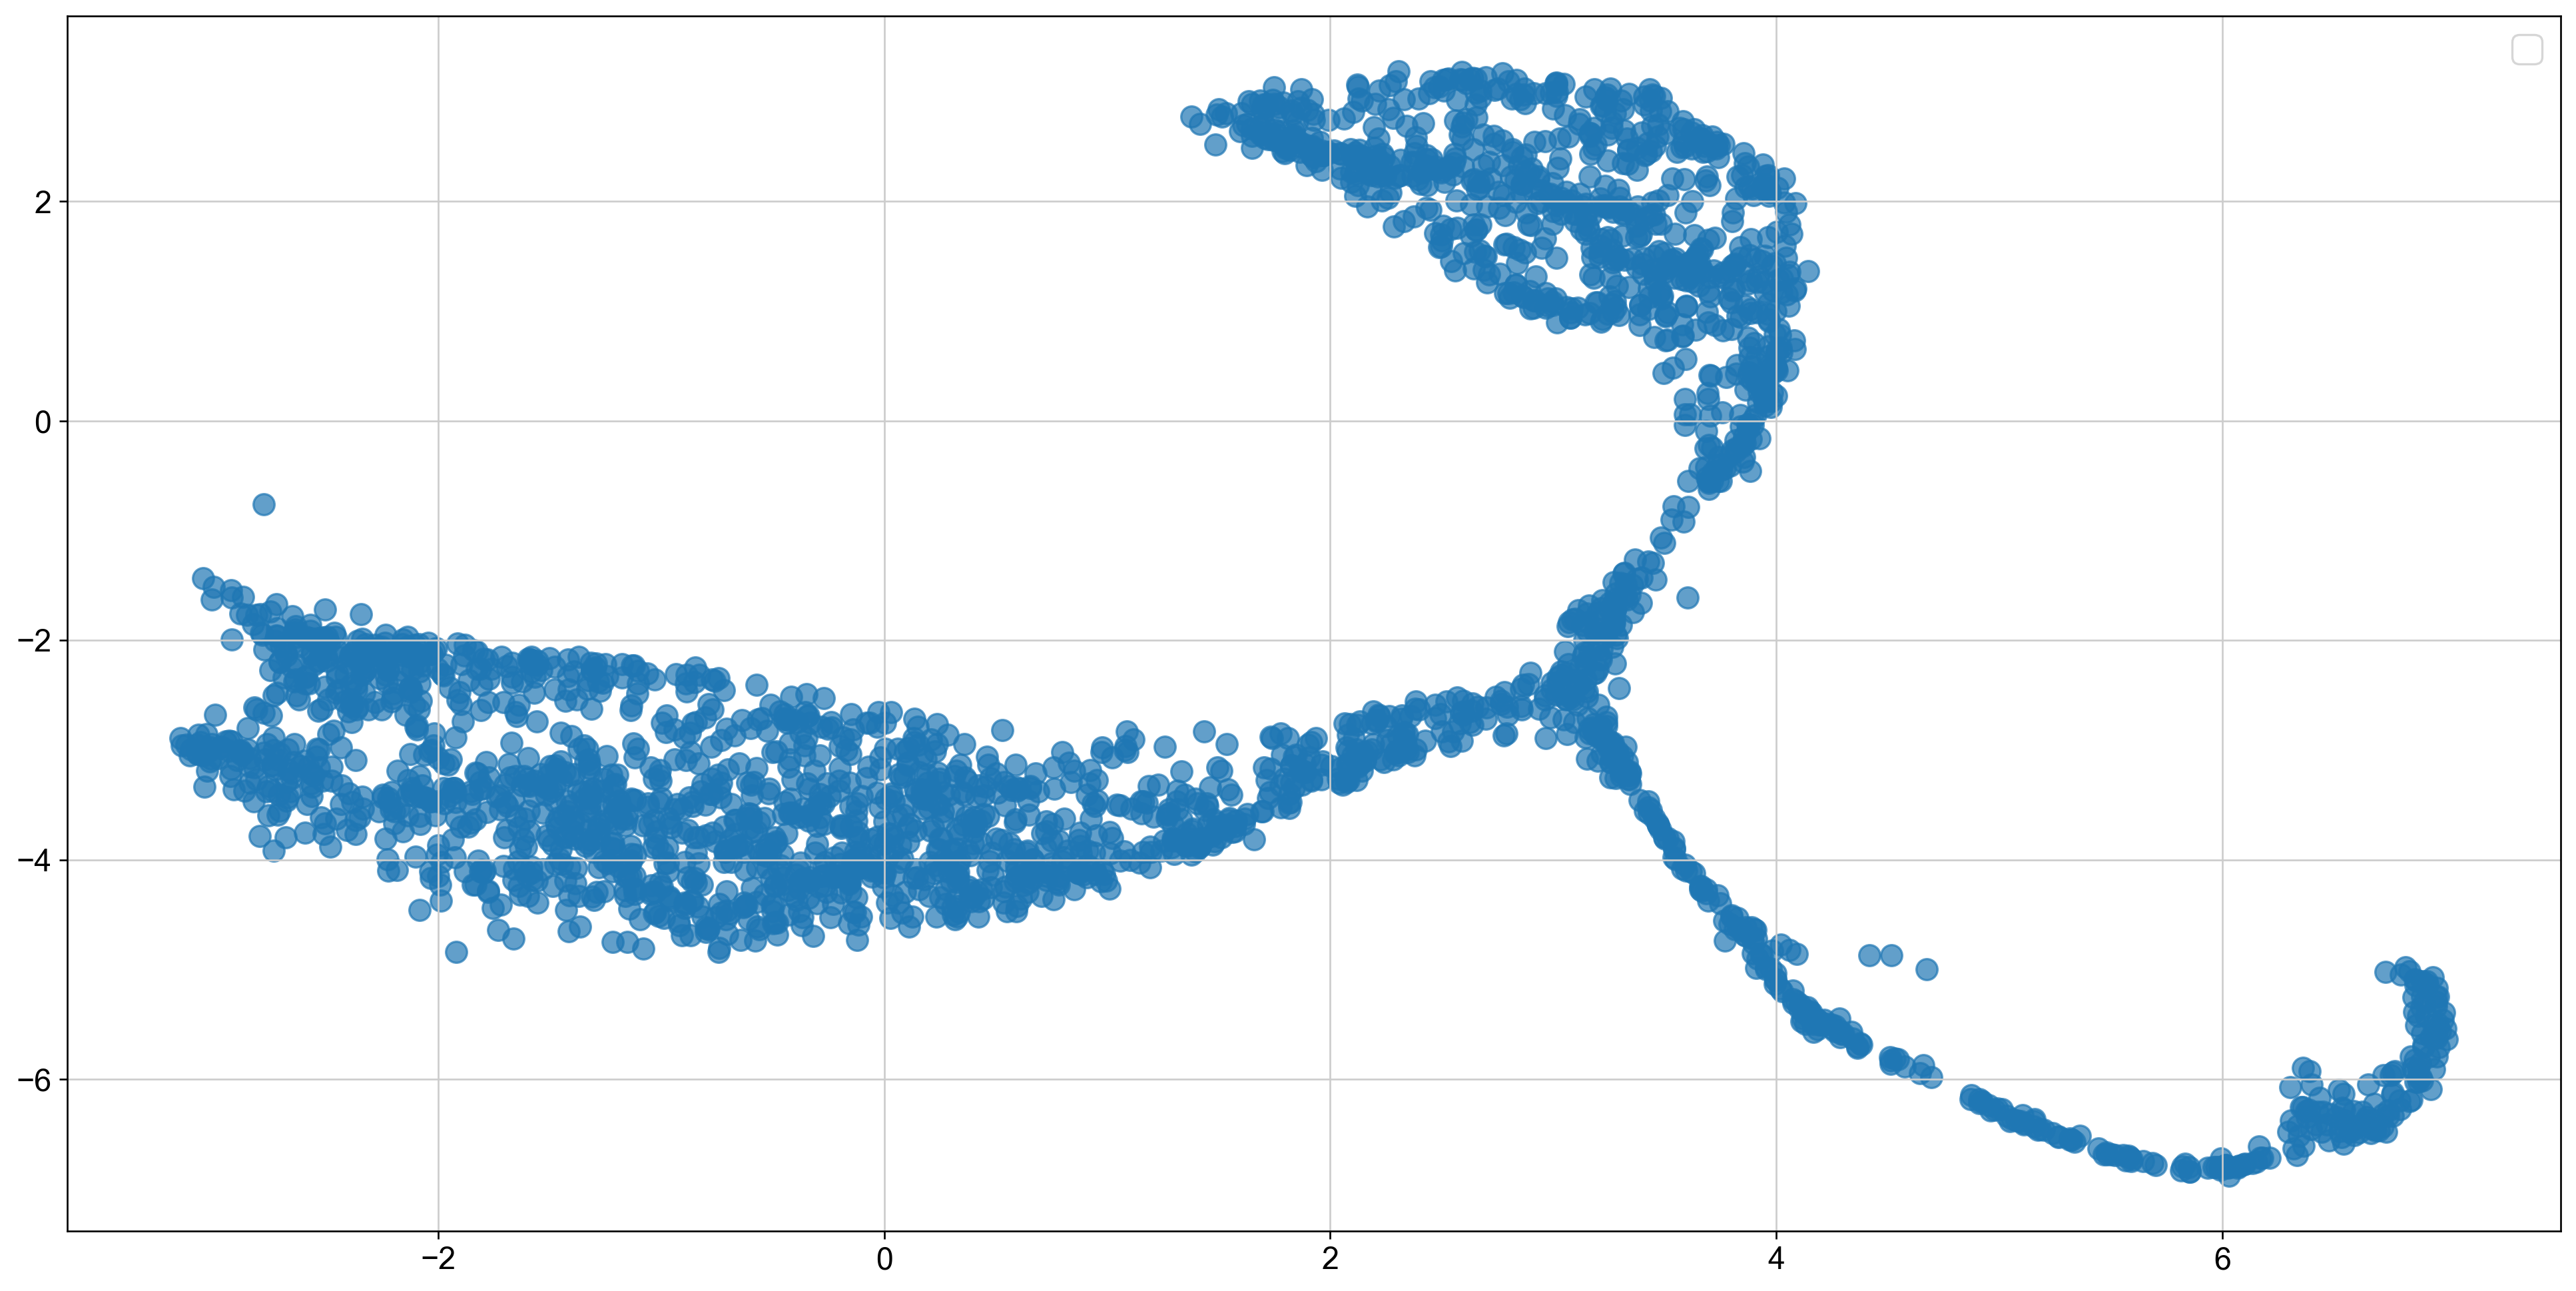

In [4]:
print('number cells', df.shape[0])

SVDcol = ["PC_" + str(a) for a in range(1,30)]

UMAPcol = ["UMAP_1","UMAP_2"]
embedding = np.array(df[UMAPcol])

fig, ax = plt.subplots(figsize=[20,10])
ax.scatter(embedding[:,0], embedding[:,1], alpha=0.7, s=90)

plt.legend(fontsize='large', markerscale=1.3)
plt.show()

In [16]:
# Rerun point

# Setting VIA parameters
knn = 18
random_seed = 42
v0_too_big_factor=0.45
v1_too_big_factor=0.2
jac_std_global=0.55
dist_std_local=0.5
cluster_graph_pruning_std=0.1
pseudotime_threshold_TS=50
alpha_teleport = 0.98
num_sim_branch_probability = 1000

root, dataset =  ['22'], 'group'

In [17]:
numeric_labels=df['label'].values.tolist()
character_labels = [str(g) for g in numeric_labels]

2023-09-20 11:36:19.425974	Running VIA over input data of 2809 (samples) x 29 (features)
2023-09-20 11:36:19.426292	Knngraph has 18 neighbors
2023-09-20 11:36:20.705572	Finished global pruning of 18-knn graph used for clustering at level of 0.55. Kept 67.4 % of edges. 
2023-09-20 11:36:20.719032	Number of connected components used for clustergraph  is 1
2023-09-20 11:36:20.784933	Commencing community detection
2023-09-20 11:36:20.817452	Finished running Leiden algorithm. Found 27 clusters.
2023-09-20 11:36:20.818139	Merging 2 very small clusters (<10)
2023-09-20 11:36:20.818633	Finished detecting communities. Found 25 communities
2023-09-20 11:36:20.818788	Making cluster graph. Global cluster graph pruning level: 0.1
2023-09-20 11:36:20.823145	Graph has 1 connected components before pruning
2023-09-20 11:36:20.824754	Graph has 4 connected components after pruning
2023-09-20 11:36:20.826640	Graph has 1 connected components after reconnecting
2023-09-20 11:36:20.827070	0.0% links trimmed

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


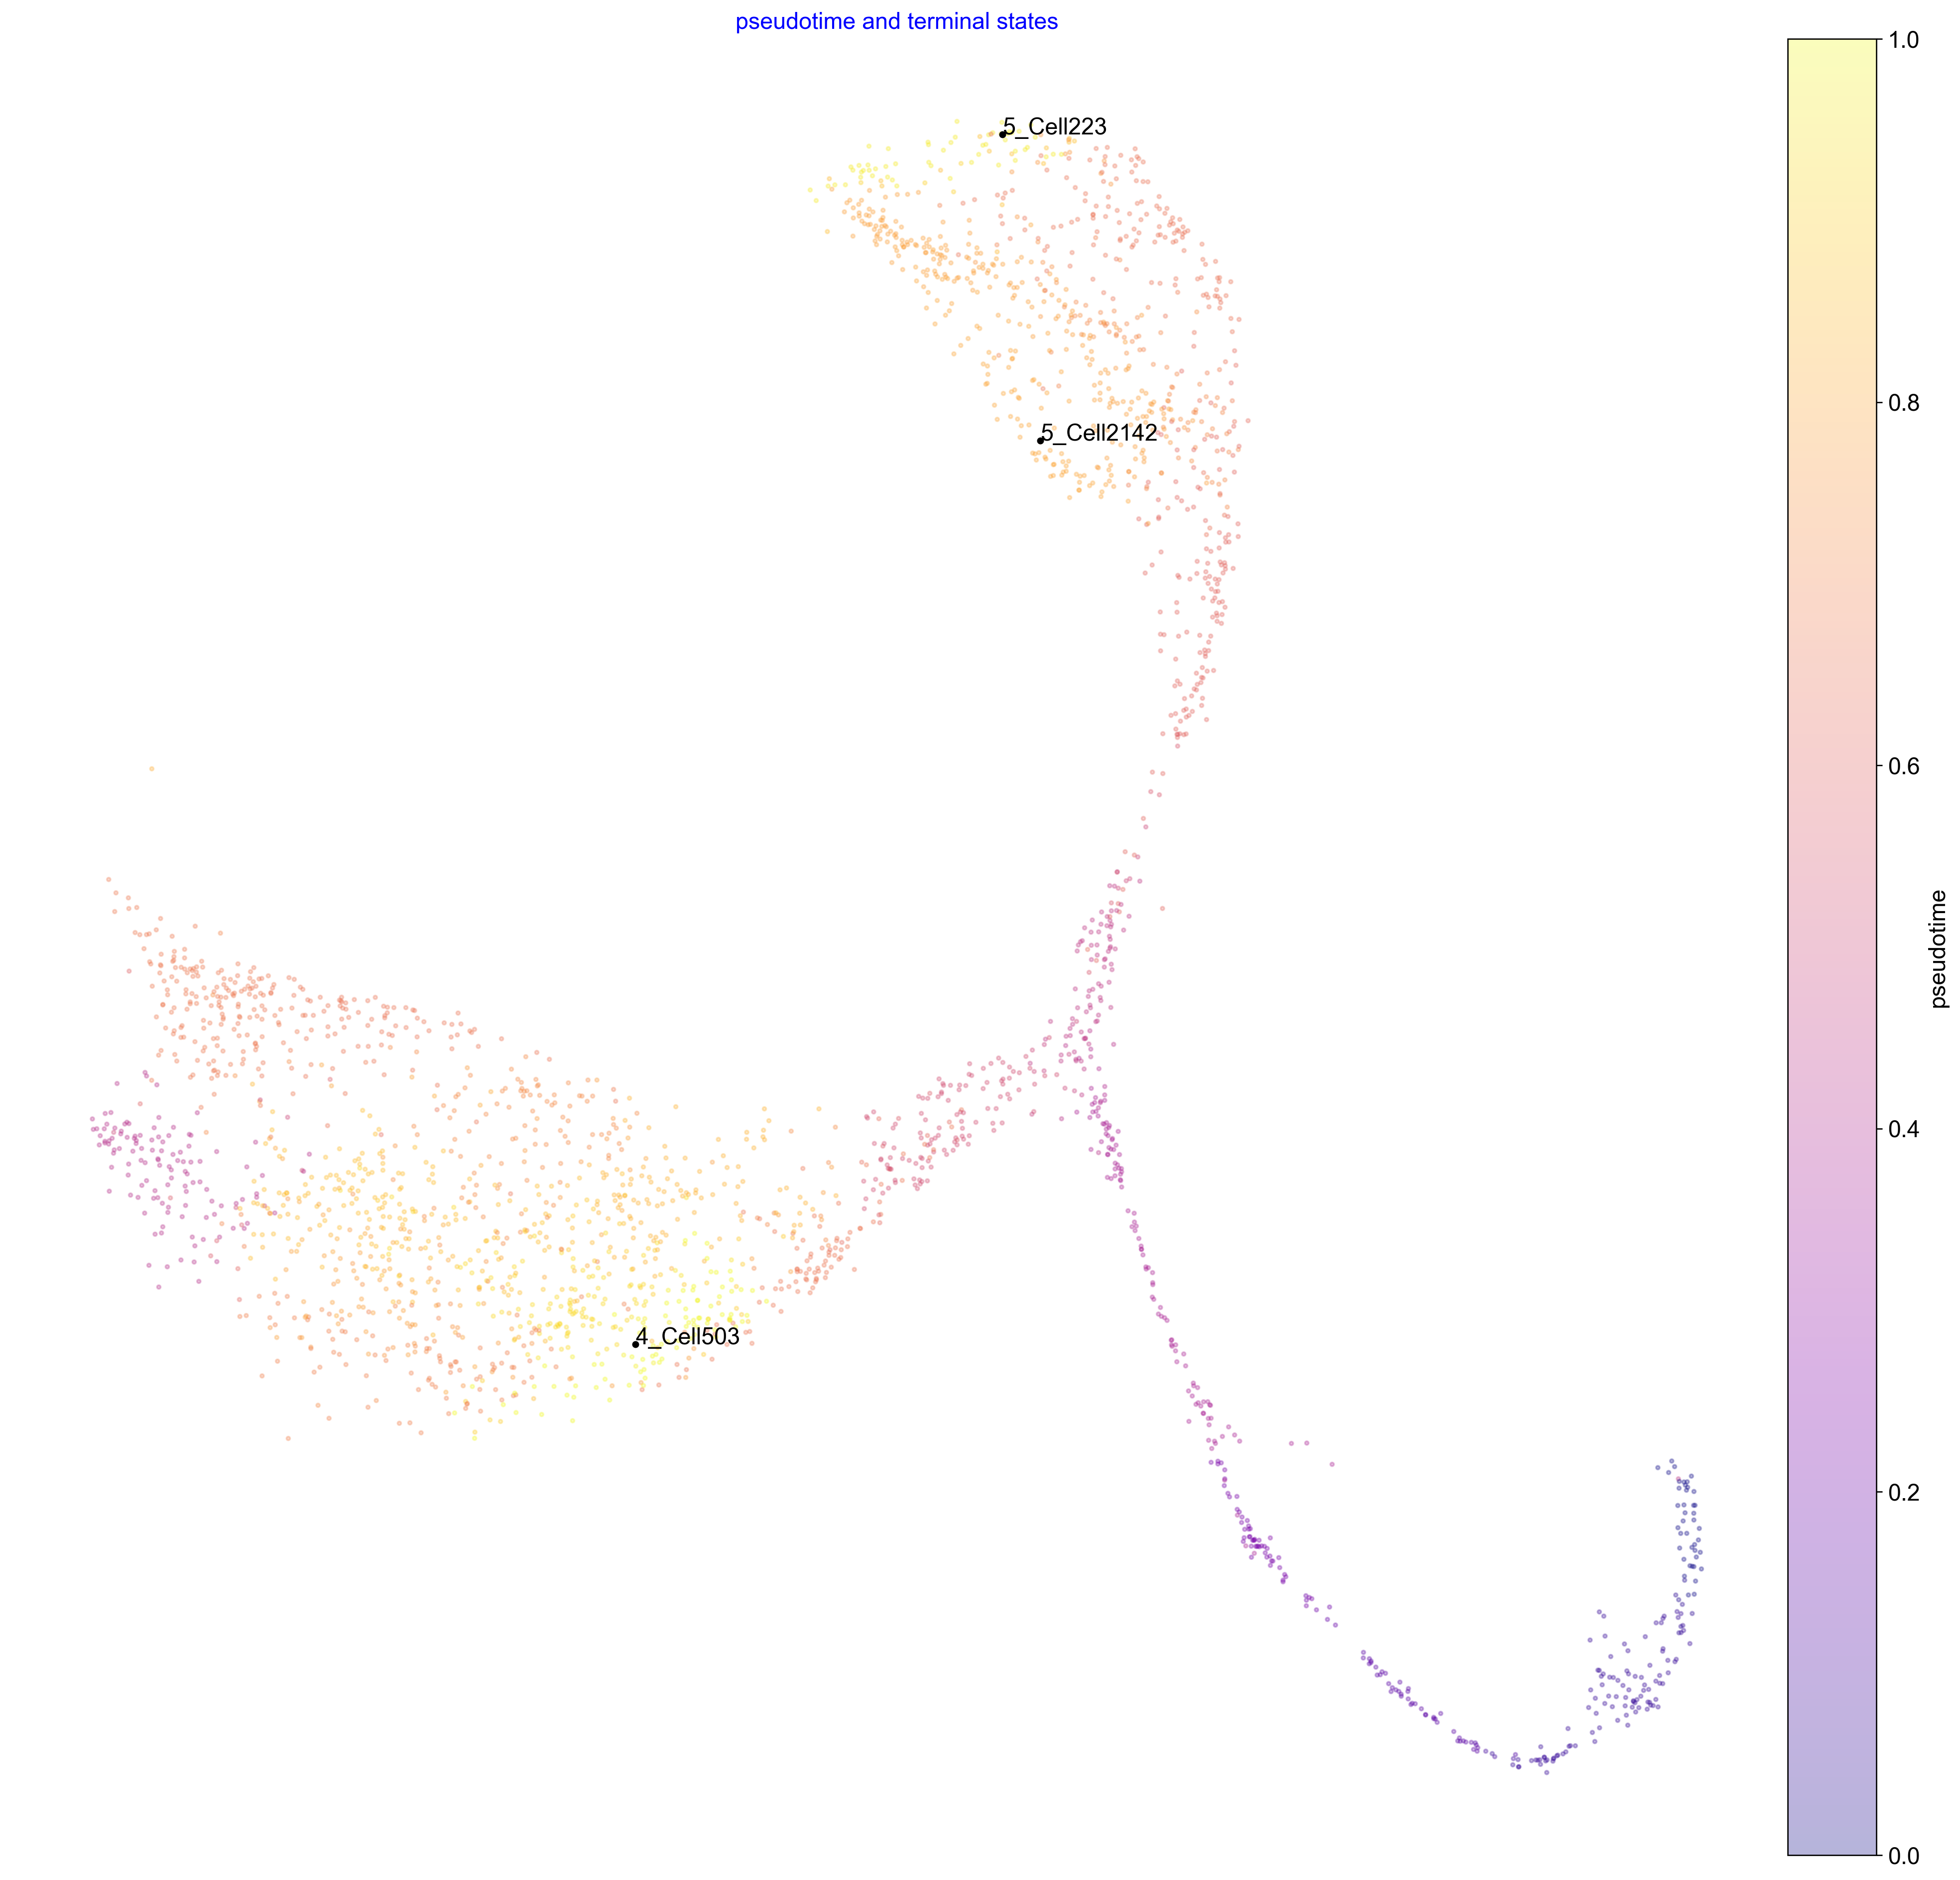

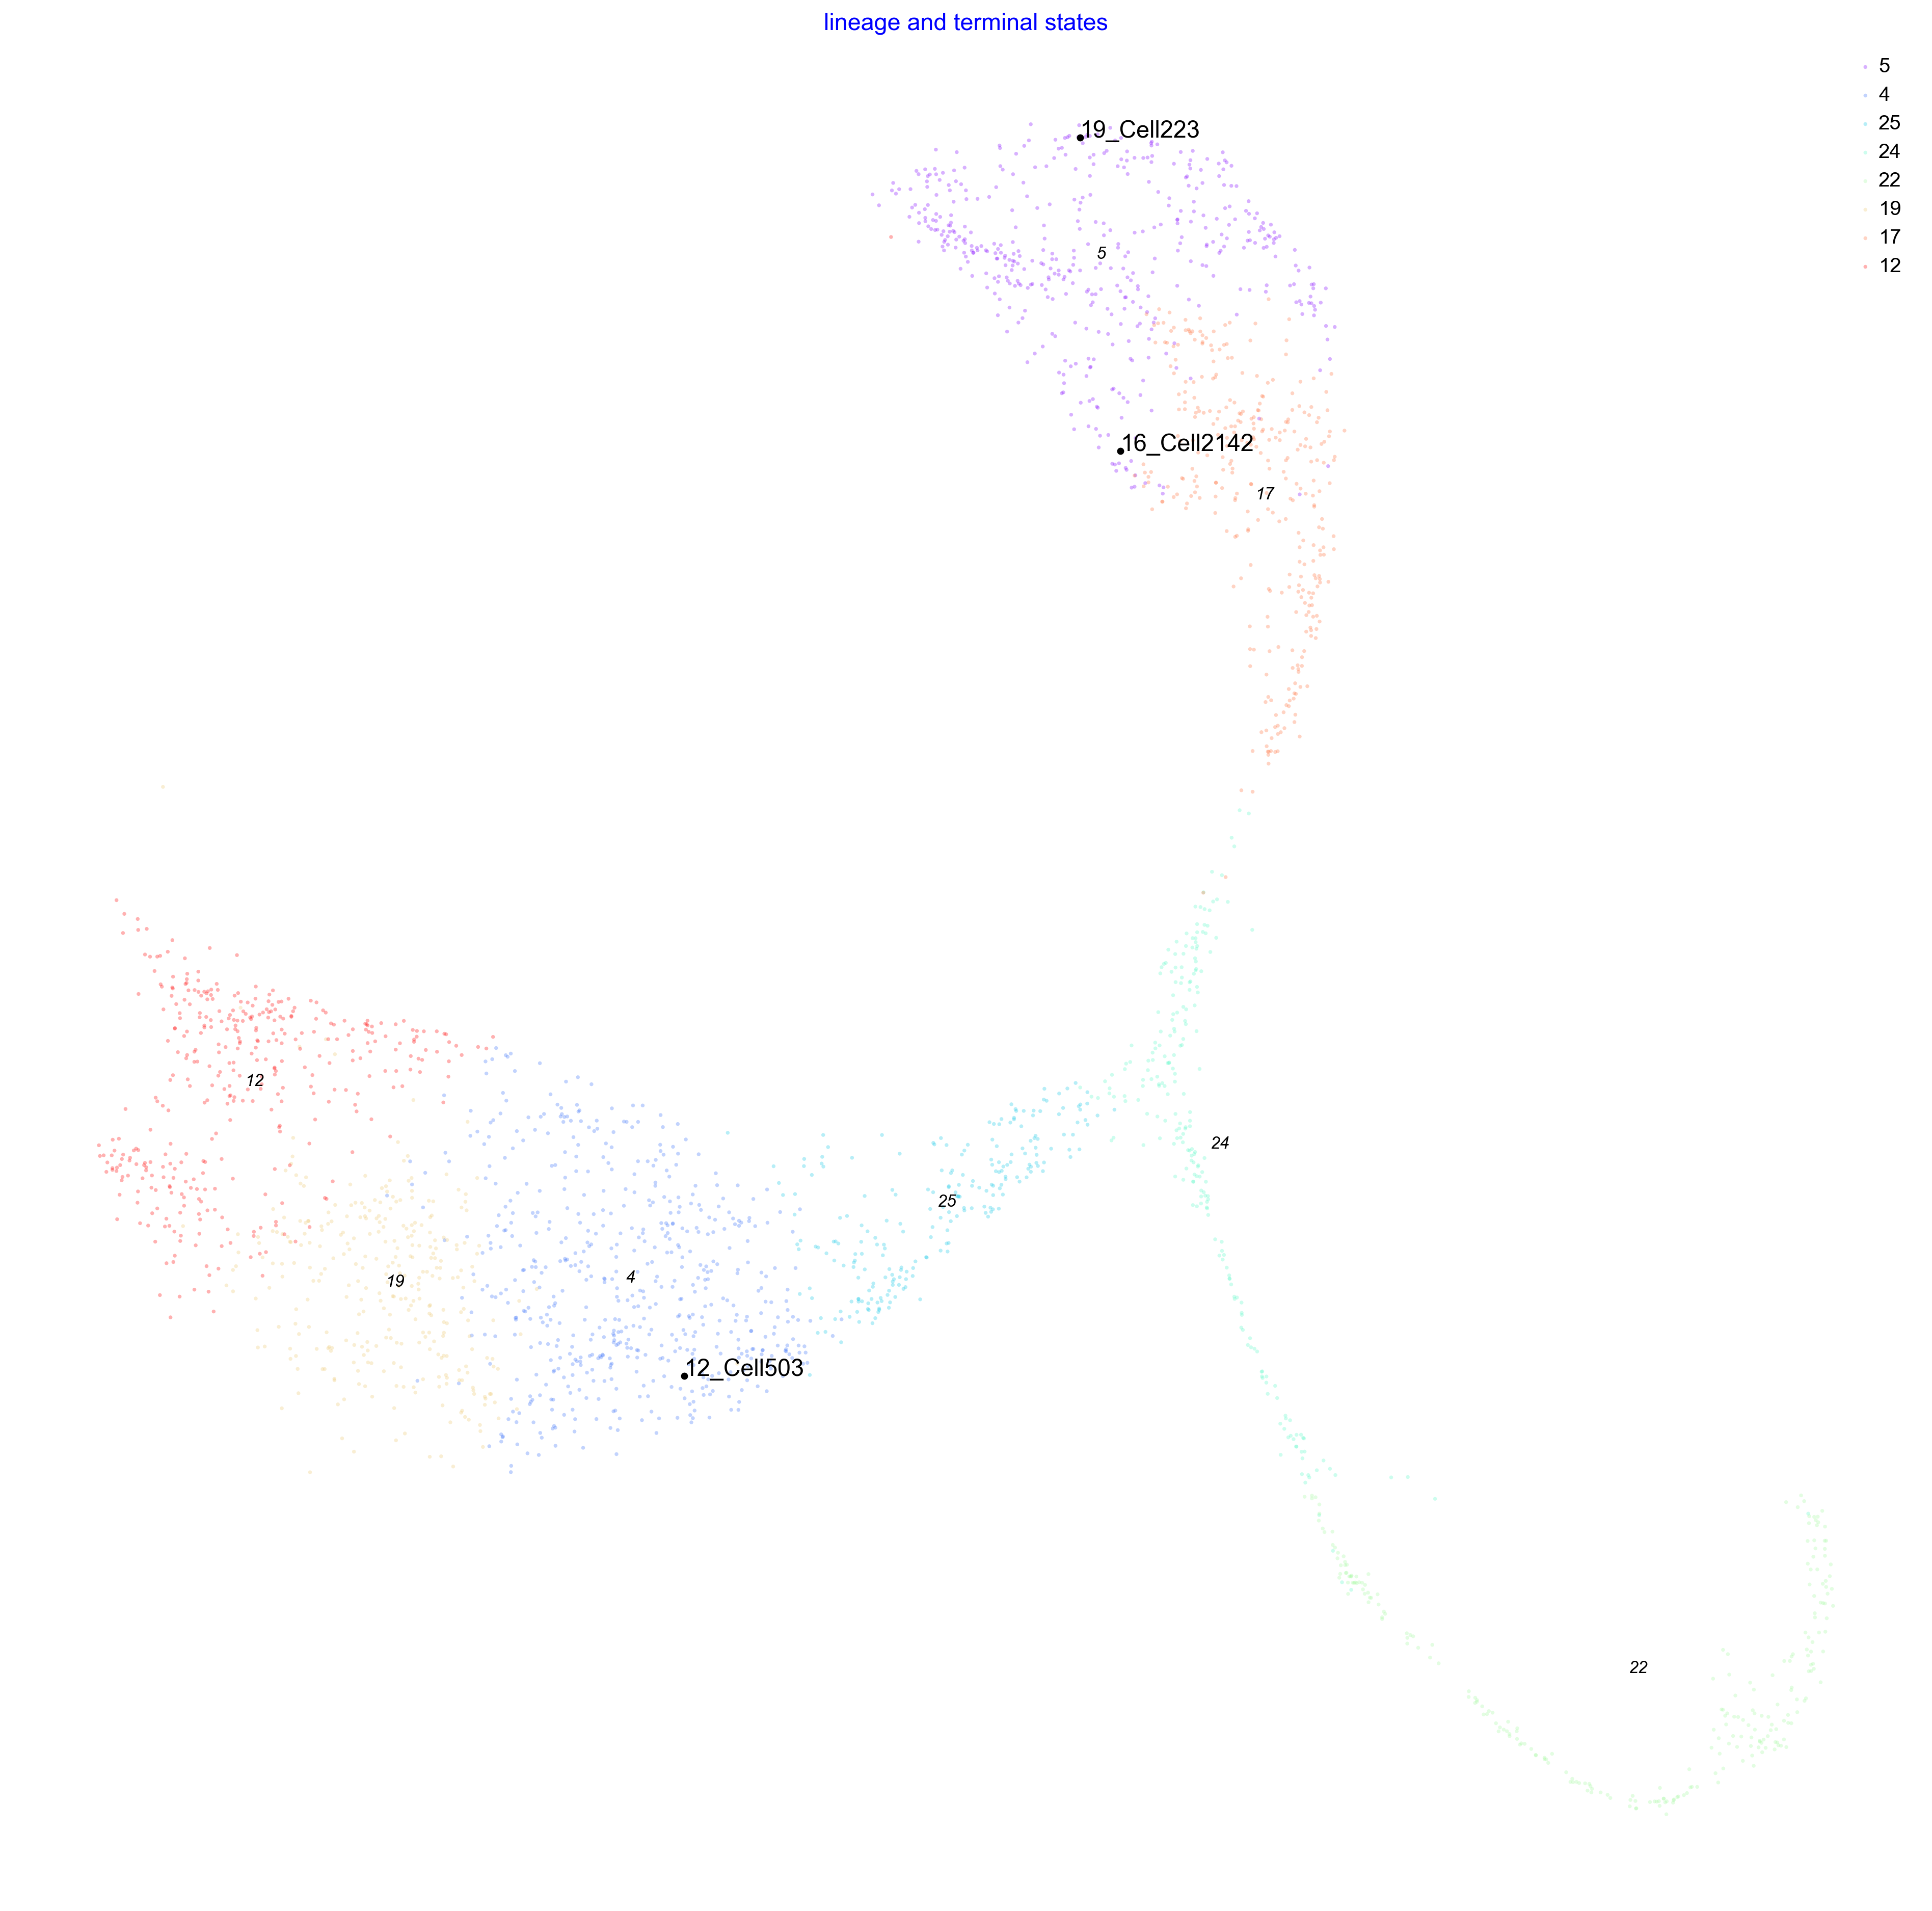

2023-09-20 11:36:26.964596	Time elapsed 7.0 seconds


In [18]:
# Running VIA coarse
X_in = df[SVDcol].values

v0 = via.VIA(X_in,true_label=character_labels, jac_std_global=jac_std_global, cluster_graph_pruning_std=cluster_graph_pruning_std, knn=knn, dist_std_local=dist_std_local, num_mcmc_simulations=num_sim_branch_probability,  
         too_big_factor=v0_too_big_factor,pseudotime_threshold_TS=pseudotime_threshold_TS,root_user=root, alpha_teleport = alpha_teleport, dataset=dataset, random_seed=random_seed,is_coarse=True, preserve_disconnected_after_pruning=False, edgebundle_pruning_twice = True, embedding=embedding) 
v0.run_VIA()

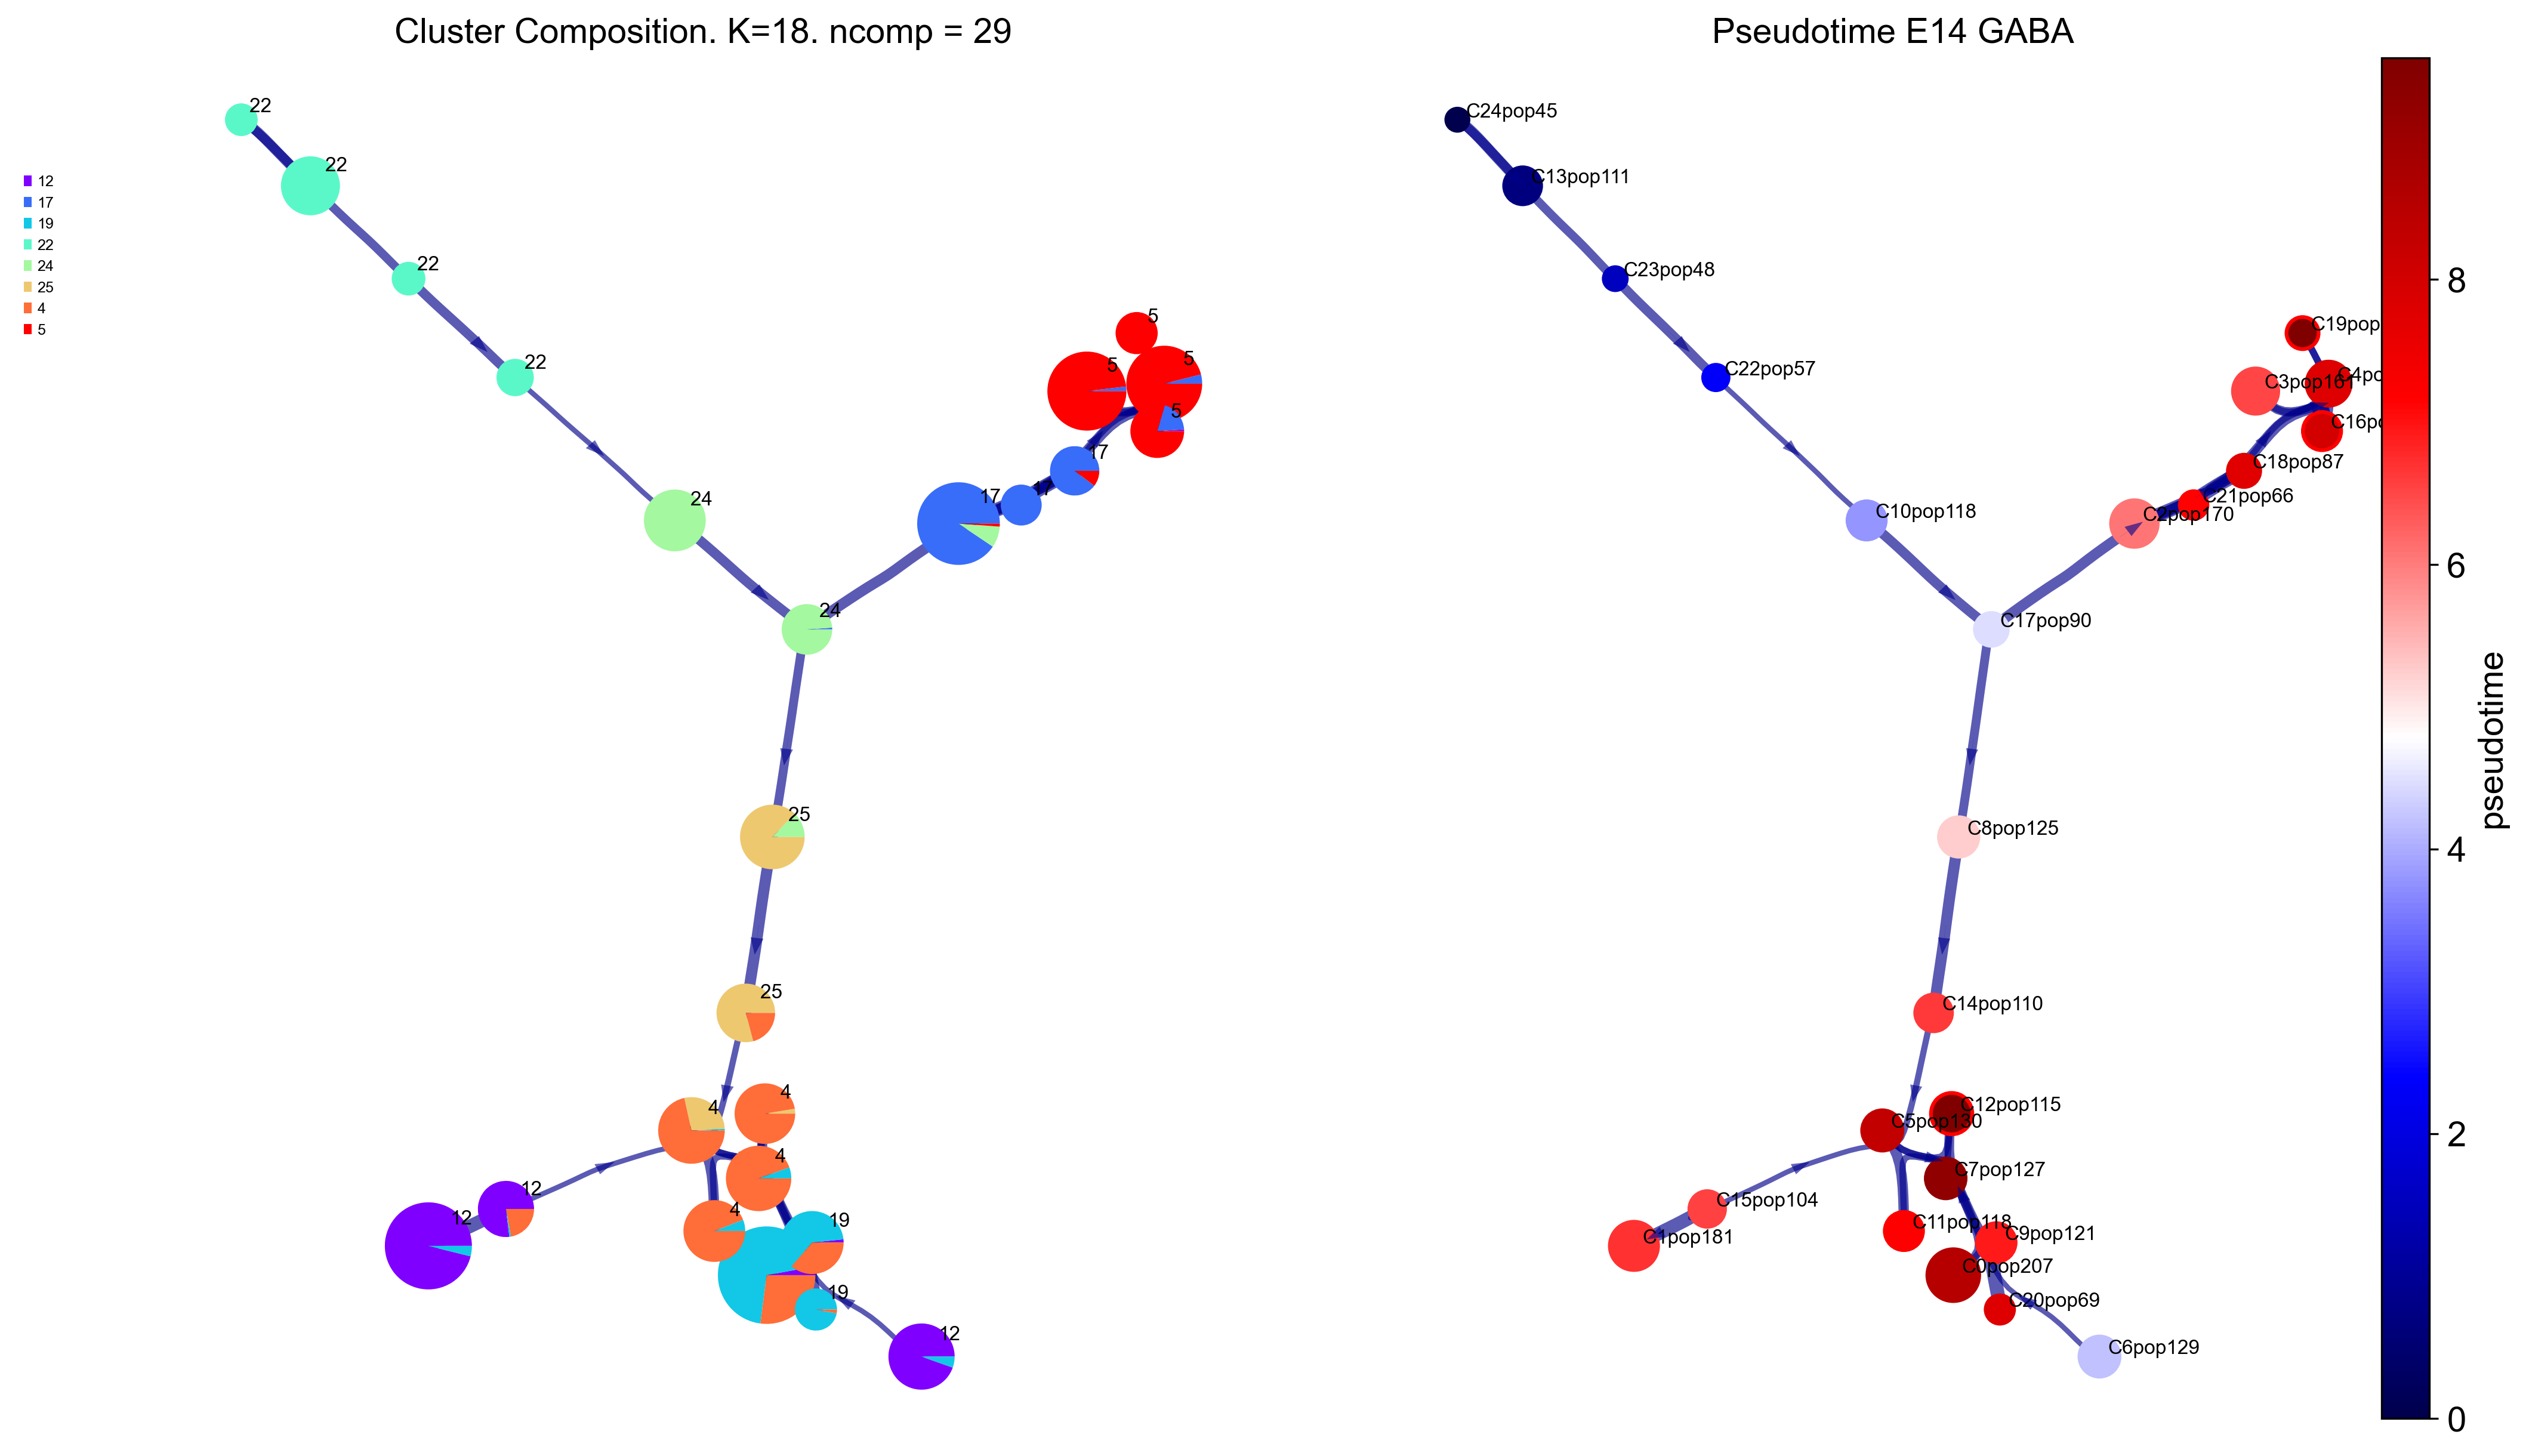

In [19]:
plt.rcParams["figure.figsize"]=16,10
via.draw_piechart_graph(v0,type_data='pt', title='E14 GABA', dpi=150, cmap='seismic', ax_text=True,  linewidth_edge=4)
plt.savefig("/Users/kilpinen/OneDrive - University of Helsinki/E12R1 project/Manuscript I - Regulation of Tal1 dependent rV2 lineage bifurcation/Figures/plots/E12_rV2_scRNA_piechart.pdf", format="pdf", bbox_inches="tight")

In [20]:
#save_object(v0, 'v0.pkl')

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


2023-09-20 11:36:36.336838	Super cluster 12 is a super terminal with sub_terminal cluster 12
2023-09-20 11:36:36.336965	Super cluster 16 is a super terminal with sub_terminal cluster 16
2023-09-20 11:36:36.336991	Super cluster 19 is a super terminal with sub_terminal cluster 19


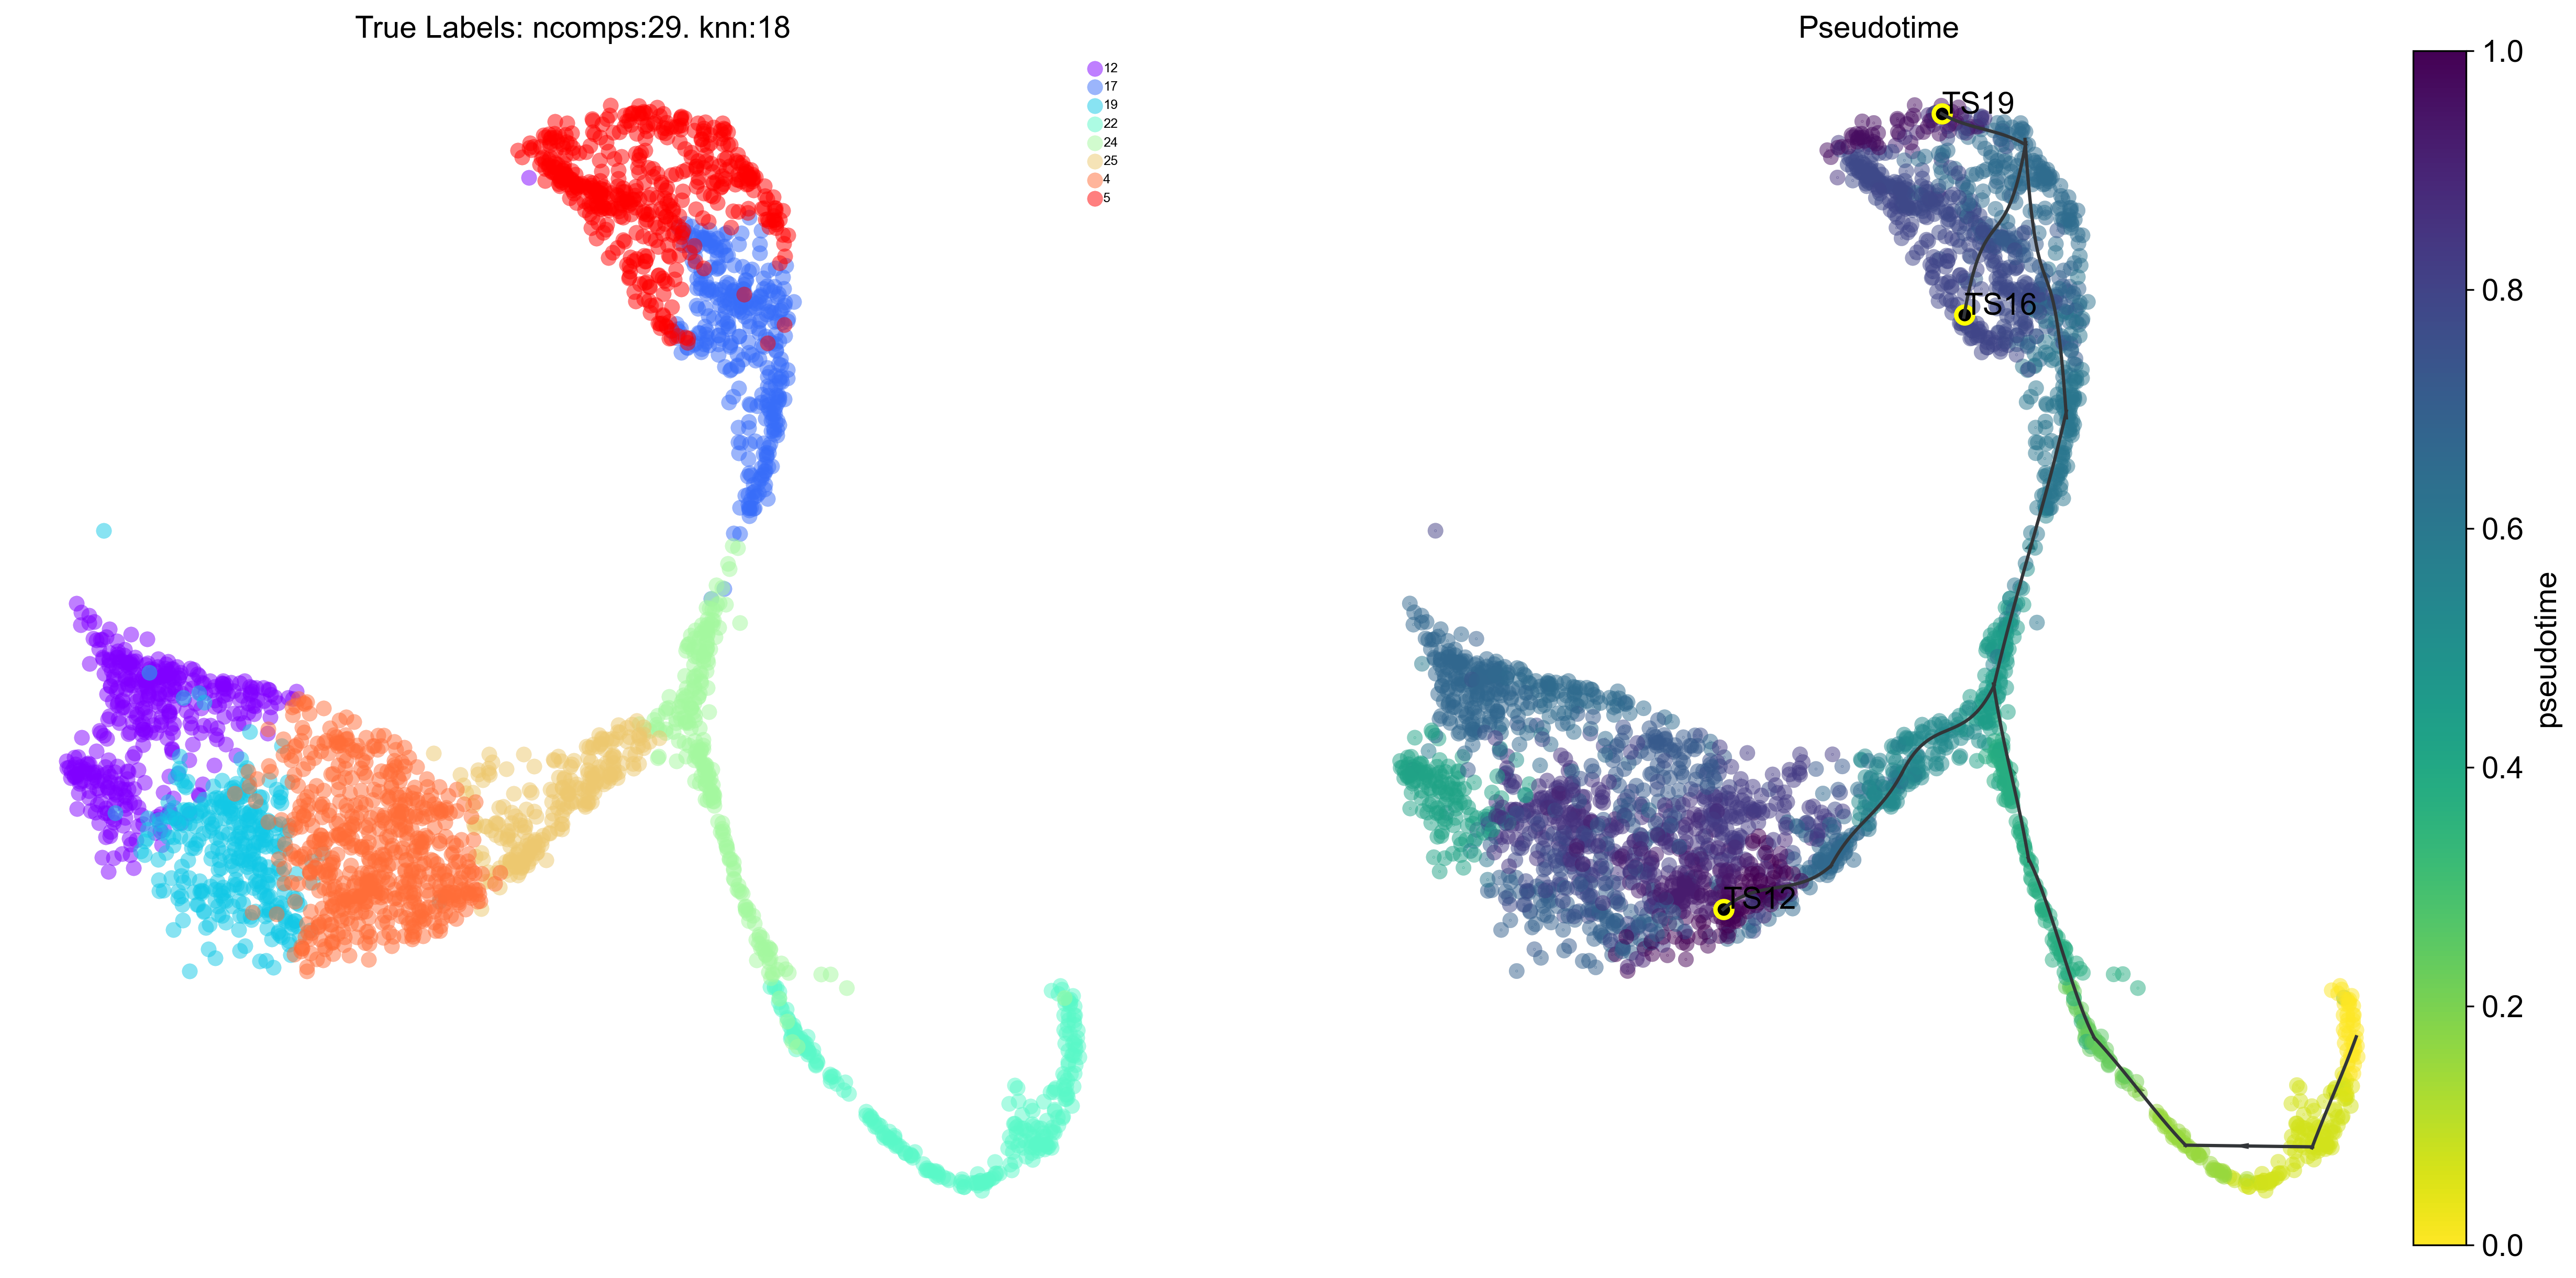

In [21]:
fig, ax, ax1 = via.draw_trajectory_gams(via_object=v0,embedding=embedding, draw_all_curves=False)
plt.savefig("/Users/kilpinen/OneDrive - University of Helsinki/E12R1 project/Manuscript I - Regulation of Tal1 dependent rV2 lineage bifurcation/Figures/plots/E12_rV2_scRNA_trajectory.pdf", format="pdf", bbox_inches="tight")

In [28]:
df['pseudotime'] = v0.single_cell_pt_markov
df2 = df[['barcode', 'pseudotime']]
df2.to_csv('/Users/kilpinen/Workspace/rV2_bifurcation/analysis/rv2_scRNA_via_pseudotime_200923.csv')

(<Figure size 3000x3000 with 1 Axes>,
 <AxesSubplot:title={'center':'Streamplot'}>)

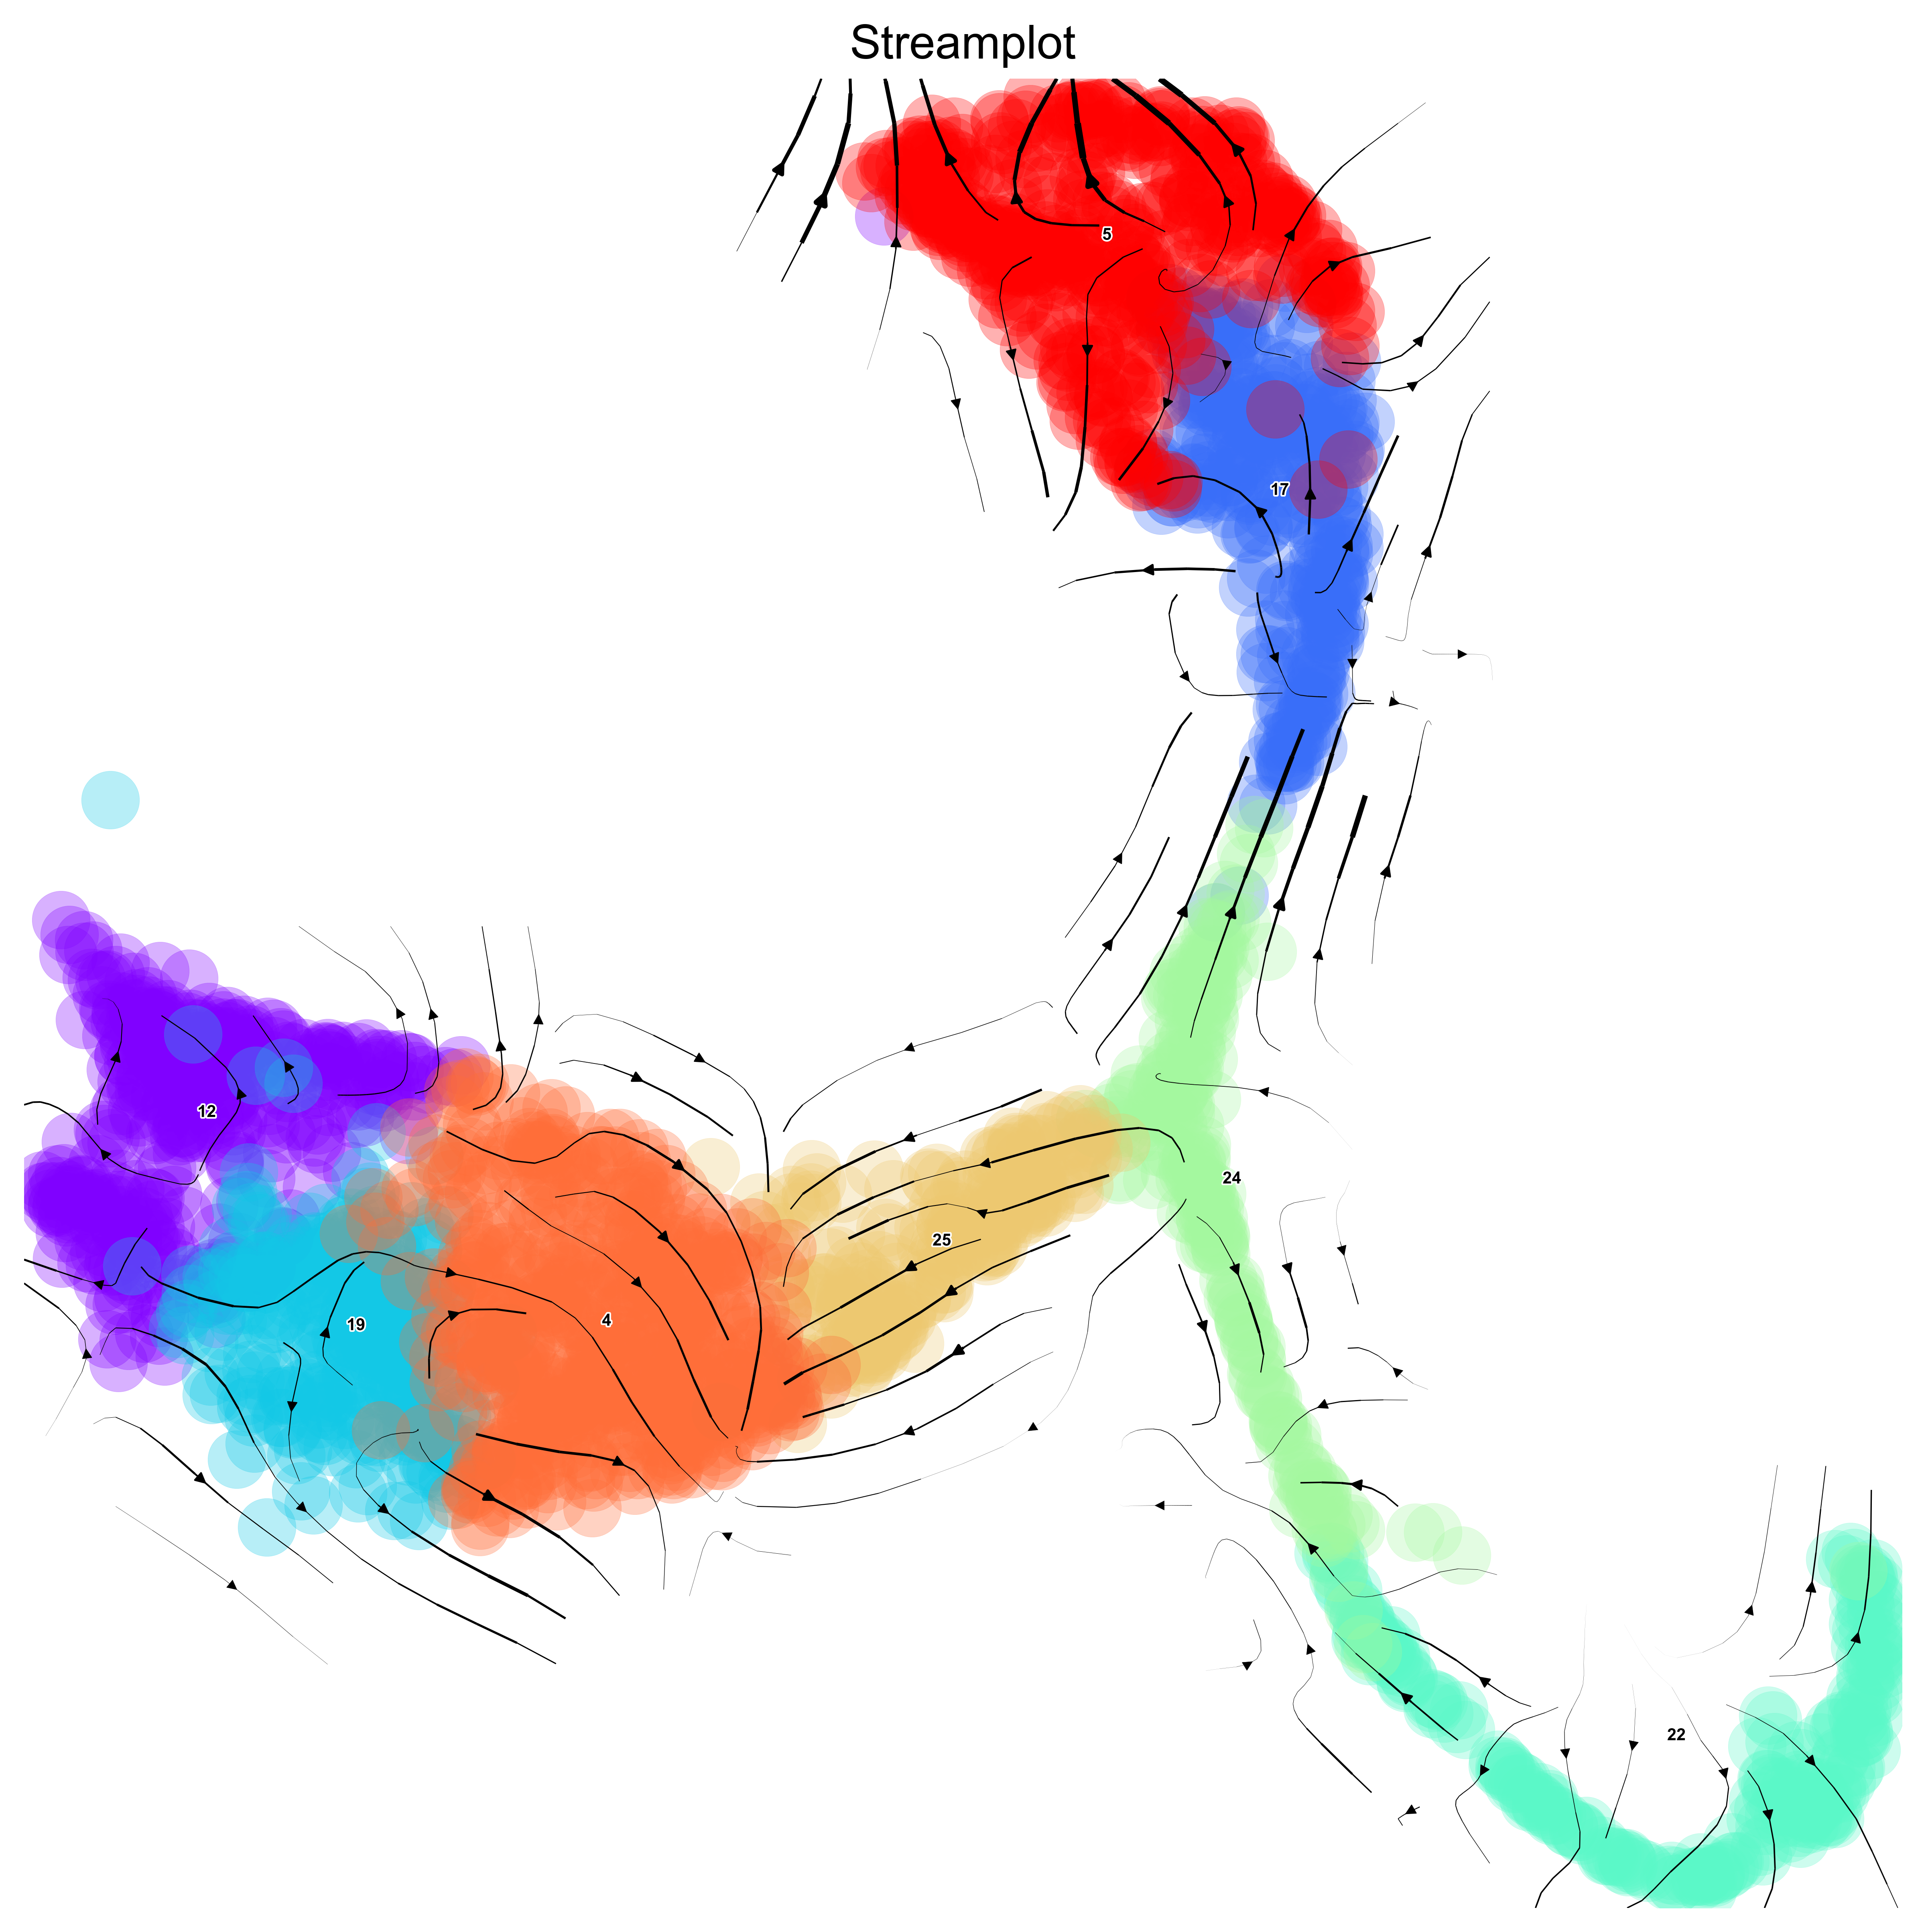

In [22]:
#draw a field plot of cell level directionality on umap
plt.rcParams["figure.figsize"]=10,10
via.via_streamplot(via_object=v0, embedding=embedding, scatter_size=300, scatter_alpha=0.3, smooth_transition=3, linewidth=1.2, density_stream=1.4)

In [ ]:
via_mds_embedding1 = embedding
f,ax = via.plot_edge_bundle(via_object=v0, n_milestones=25, linewidth_bundle=8, alpha_bundle_factor=2.5,cmap='plasma_r', facecolor='white', size_scatter=10, alpha_scatter=0.2, scale_scatter_size_pop=False,extra_title_text='pseudotime', headwidth_bundle=.5)

In [ ]:
f, ax = via.plot_scatter(embedding=via_mds_embedding1, labels=v0.true_label, s=10, alpha=0.5, title='via-mds')

In [ ]:
via.draw_sc_lineage_probability(via_object=v0,embedding=embedding, alpha_factor=1)
plt.savefig("/Users/kilpinen/OneDrive - University of Helsinki/E12R1 project/Manuscript I - Regulation of Tal1 dependent rV2 lineage bifurcation/Figures/plots/E12_rV2_scRNA_lineage_prob.pdf", format="pdf", bbox_inches="tight")